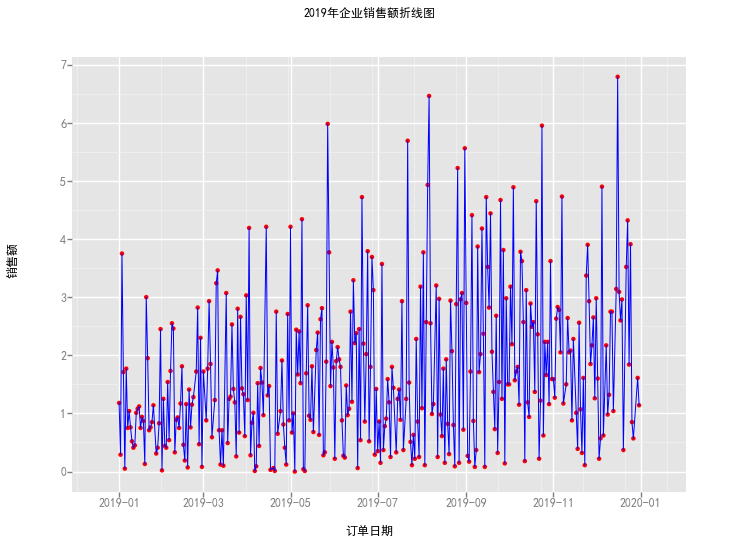

<ggplot: (-9223371903809528900)>


In [2]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import ggplot as gp
import pymysql

plt.rcParams['font.sans-serif'] = ['SimHei']   #中文字体设置

#连接MySQL数据库
v1 = []
v2 = []
conn = pymysql.connect(host='127.0.0.1',port=3306,user='root',password='root',db='sales',charset='utf8')
cursor = conn.cursor()

#读取MySQL数据
sql_num = "SELECT order_date,ROUND(SUM(sales)/10000,2) FROM orders where dt=2019 GROUP BY order_date"
cursor.execute(sql_num)
sh = cursor.fetchall()
for s in sh:
    v1.append(s[0])
    v2.append(s[1])    

meat =pd.DataFrame(list(sh),index=v1,columns=['订单日期','销售额'])
p=gp.ggplot(gp.aes(x='订单日期',y='销售额'),data=meat)+gp.geom_point(color='red')+gp.geom_line(color='blue')+gp.ggtitle(u'2019年企业销售额折线图')
print(p)